# Import libraries

In [3]:
! pip install nltk 


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
! pip install langdetect 

  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=19adf5e4e67c6bc336111d9e72b788dfaf1e55483a5be14a9aedf9a0c8c1d2d5
  Stored in directory: c:\users\start\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression
from langdetect import detect_langs # language detection
import nltk # natural language processing
from nltk.corpus import stopwords # stopwords
import matplotlib.pyplot as plt # visualization

# `Explore data`

In [2]:
kaggle_path ="/kaggle/input/tweeter-data/raw_data.csv"
data = pd.read_csv("../data/raw_data.csv") # read data 
data.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   dialect  147725 non-null  object
 2   text     147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [3]:
# check duplicates 
data.duplicated().sum()

0

In [4]:
# check data balance
(data["dialect"].value_counts()).index, ((data["dialect"].value_counts()).values / len(data)) *100

(Index(['EG', 'LY', 'LB', 'SD', 'MA'], dtype='object'),
 array([39.0157387 , 24.7073955 , 18.69487223,  9.77085801,  7.81113556]))

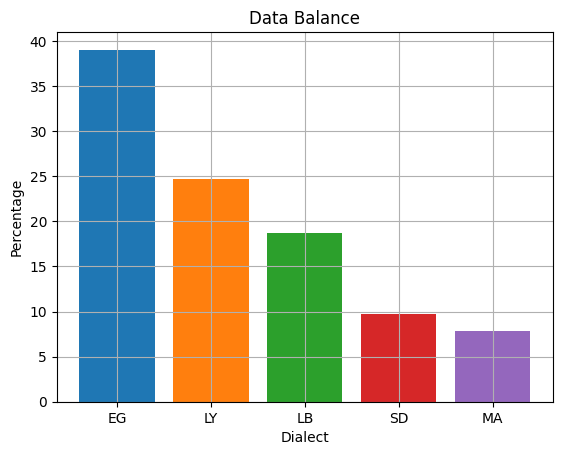

In [5]:
# visualize data balance
plt.bar((data["dialect"].value_counts()).index, ((data["dialect"].value_counts()).values / len(data)) *100
        , color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
        ) # bar plot
plt.title("Data Balance") # title
plt.xlabel("Dialect") # x label
plt.ylabel("Percentage") # y label
plt.grid() # grid

### data impalance EG has most data sample

In [6]:
pd.options.display.max_rows = 200 
pd.options.display.max_columns = 1900
pd.set_option('display.max_colwidth', 1000)

In [7]:
# display samples from data
data["text"][100:200]

100                                                                                                                                                                                                                                     @kawtheraljahmi الله يسلمك، بالتأكيد مفيدة.
101                                                                                                                                                                                                                                    @AAlkoat عيدك مبروك وعقبال داير إن شاء الله.
102                                                                                                                                                                                                                                    @MoheBishte تسلم محي، عيدك مبارك إن شاء الله
103                                                                                                                                                                         

# For cleaning we need
- remove english language
- remove numbers
- remove puncituation 
- remove under score
- remove emojy and strange language
- remove stop words 

In [8]:
def remove_english_language(text):
  pattern = r"[a-zA-Z\s]+"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [9]:
def remove_numbers(text):
  pattern = r'\d+'
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [10]:
def remove_puncituation(text):
  pattern = r"[^\w\s]"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [11]:
def remove_uderScore(text):
  pattern = r"_"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [12]:
def remove_Tifinagh_characters(text): 
  ''' Tifinagh characters are used in Tamazight 
  like ⴰ ⴱ ⵛ ⴷ ⴹ ⴻ ⴼ ⴳ ⵀ ⵃ ⵉ ⵊ ⴽ ⵍ ⵎ ⵏ ⵓ ⵔ ⵕ ⵙ ⵜ ⵡ ⵅ ⵢ ⵣ ⵥ ⵄ ⵅ
  '''
  pattern = r'[\u2D30-\u2D7F]+'
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

In [13]:
def remove_additional_space(text):
  pattern = r"\s{2,}"
  regex_pattern = re.compile(pattern)
  text = re.sub(regex_pattern," ",text)
  return text

### try remove stop words

In [14]:
nltk.download('stopwords')
list_of_stop_words = stopwords.words('arabic')
type(list_of_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\start\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


list

In [15]:
modified_list_stop_words = []
for word in list_of_stop_words:
    pattern = re.compile(r'\b[إ,أ]')
    # replace the first letter of each word with a dash (-) using re.sub()
    new_word = re.sub(pattern, 'ا', word)
    modified_list_stop_words.append(new_word)
    

In [16]:
def remove_stop_words(text):
    '''
    This function removes stop words from a sentence
    args:
        text: a string of text
    '''
    # define the regex pattern to match words to remove
    pattern = re.compile(r'\b(' + '|'.join(modified_list_stop_words) + r')\b')
    # remove words from the sentence that appear in the words_to_remove list using re.sub()
    clean_sentence = re.sub(pattern, '', text)
    # print the resulting clean sentence
    return clean_sentence

In [17]:
def remove_repeated_characters(text):
    '''
    This function removes repeated characters from a sentence
    if a character is repeated more than twice
    
    args:
        text: a string of text
    '''
    pattern = r'(.)\1{2,}'
    regex_pattern = re.compile(pattern)
    text = re.sub(regex_pattern,r'\1',text)
    return text

In [18]:
def all_cleaning(text):
    '''
    This function is used to clean the text
    
    '''
    text = remove_english_language(text)
    text = remove_puncituation(text)
    text = remove_numbers(text)
    text = remove_uderScore(text)
    text = remove_Tifinagh_characters(text)
    text = remove_stop_words(text)
    text = remove_additional_space(text)
    text = remove_repeated_characters(text)
    return text

In [19]:
cleaned_data = data.copy(deep = False) # copy data 'deep = False' to copy only the reference

In [20]:
# apply to all data
cleaned_data["text"] = cleaned_data["text"].apply(all_cleaning)

In [36]:
cleaned_data.head(25) # display first 5 rows

,id,dialect,text
0,1009754958479151232,LY,قليلين ادب ومنافقين اختهم قريبتهم تتعاكس تقولي عليهم نشاط حقوق المرأة ردة فعلهم
1,1009794751548313600,LY,الليبيين متقلبين بالنسبة ليا ميليشياوي زمان وتوة
2,1019989115490787200,LY,تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها البنات وبيحس كأنه يعرفها زمان بعدين يتزوج وحدة منهن وممكن ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب اند
3,1035479791758135168,LY,رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم انسان قليل الادب ثانيا شن ذنب يلي معندهش اب خوت خوات يعني اليتيمة متستحقش تتزوج وثالثا ليش البنت لازم ادير حساب للراجل متستحقش يندارلها حساب عبدة
4,1035481122921164800,LY,شكلك متعقدة علشان الراجل تحبيه ازوج بنت يتيمة بنت معندهش خوت هدي اعصابك وفكينا التخلف امتاعك
5,877881537122979840,LY,دين طائفة اسف ممكن الغلط غلطتي مكنش قصدي
6,882940840888471552,LY,باهي نستنوه بلكي مشغول حاجة
7,882941769444466688,LY,اختلفنا راه نحنا خوت والله عندي فرحان نقدر انروح لحوشنا وفرحان للناس الاخرى الفرحانة ربي يفرجها وعلينا كلنا
8,882943694906818560,LY,بالنسبة ليا والله شبعت ونكد وقتل ودم والحقد الله يهدينا جميعا
9,884736569118261248,LY,مو نحنا الحياة عندنا مية مية ومعندش شي اندكوا راسنا لبس الشورتات تخلف


In [37]:
# data Example before cleaning and after cleaning random sample
'''
This function will choose a random sample from the data
and display the text before cleaning and after cleaning
by getting the index of data and display it from cleaned_data


args:
    data: data frame
    number_of_samples: number of samples to display
    random_state: random state to choose the sample
'''

def display_random_sample(data, number_of_samples, random_state):
    for i in range(number_of_samples):
        index = np.random.randint(0, len(data))
        print("Before cleaning: ", data["text"][index])
        print("After cleaning: ", cleaned_data["text"][index])
        print("-"*100)
        
display_random_sample(data, 10, 50)


Before cleaning:  @NadiaFDI1 أنى نتفرج على الفيديو لين فشلت😂
After cleaning:   أنى نتفرج الفيديو لين فشلت 
----------------------------------------------------------------------------------------------------
Before cleaning:  @aiman19683964 @hamzasalih2 😅😅😅😅😅 ايمن نزل من الطياره فالزون طول
After cleaning:   ايمن نزل الطياره فالزون طول
----------------------------------------------------------------------------------------------------
Before cleaning:  ما #فيك_تسكت ابدا إذا حدى دق بسيادة لبنان 
مين ما كان هالحدى
After cleaning:   فيك تسكت إذا حدى دق بسيادة لبنان مين هالحدى
----------------------------------------------------------------------------------------------------
Before cleaning:  @osama_benghazi @f9cgk درنة واعرة عليه او التاريخ يشد تقرب تنحك
After cleaning:   درنة واعرة التاريخ يشد تقرب تنحك
----------------------------------------------------------------------------------------------------
Before cleaning:  @a_assawi93 حدفت التعليق يا عصاوي لاني غلطت نسحابه في منشور تاني خشت

In [38]:
# Save cleaned data
cleaned_data.to_csv("../data/cleaned_data.csv", index = False)